In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy*100:.2f}")

# 5. Save the trained model to disk
joblib.dump(model, "iris_model.pkl")
print("Model saved as 'iris_model.pkl'")

Random Forest Model Accuracy: 100.00
Model saved as 'iris_model.pkl'


In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {100*accuracy:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, "breast_cancer_model.pkl")
print("\n Model saved as 'breast_cancer_model.pkl'")



 Model Accuracy: 96.4912

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 Model saved as 'breast_cancer_model.pkl'


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

data = pd.read_csv(r"C:\Users\Jaideep\Cloud Computing Project\X\diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {100*accuracy:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, "diabetes_model.pkl")
print("\nModel saved as 'diabetes_model.pkl'")



Model Accuracy: 73.3766%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


Model saved as 'diabetes_model.pkl'


Data loaded and cleaned
Model training completed

 Model Accuracy: 74.03%

 Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



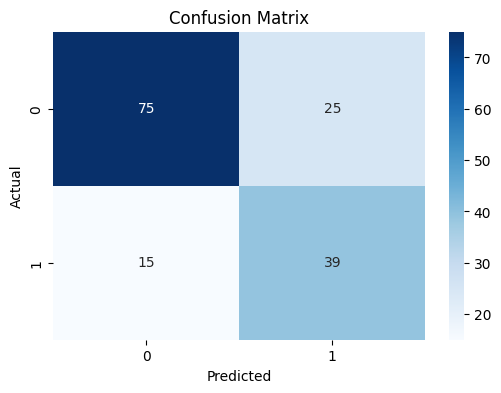


 Model saved successfully at: C:\Users\Jaideep\Cloud Computing Project\X\diabetes_model.pkl


In [8]:
import pandas as pd
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

data = pd.read_csv(r"C:\Users\Jaideep\Cloud Computing Project\X\diabetes.csv")

cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

data.fillna(data.mean(), inplace=True)

print("Data loaded and cleaned")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=10,
    class_weight="balanced",  # Fix class imbalance
    random_state=42
)

model.fit(X_train, y_train)
print("Model training completed")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n Model Accuracy: {100 * accuracy:.2f}%")
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === 10. Save Model to a Specific Folder ===

model_folder = r"C:\Users\Jaideep\Cloud Computing Project\X"
os.makedirs(model_folder, exist_ok=True)  # Create folder if it doesn't exist

# Full path for saving
model_path = os.path.join(model_folder, "diabetes_model.pkl")

# Save model
joblib.dump(model, model_path)
print(f"\n Model saved successfully at: {model_path}")
